# Imports


In [3]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np
from scripts.streaming_clusterer import CluStream
from scripts.dynamic_clusterer_multi_dimension import DynamicClusterer
from scripts.utils import get_colors

from river import drift

In [5]:
colors = get_colors()


def import_and_shuffle_csv(file_path, seed=42):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    if seed is not None:
        np.random.seed(seed)

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [6]:
# file_path, drift_type = "./data/brightness_data/final_4d_brightness.csv", "BRIGHTNESS-4D"
# file_path, drift_type = "./data/brightness_data/final_8d_brightness.csv", "BRIGHTNESS-8D"
# file_path, drift_type = "./data/brightness_data/final_16d_brightness.csv", "BRIGHTNESS-16D"
# file_path, drift_type = "./data/brightness_data/final_32d_brightness.csv", "BRIGHTNESS-32D"
# file_path, drift_type = "./data/brightness_data/final_64d_brightness.csv", "BRIGHTNESS-64D"
# file_path, drift_type = "./data/brightness_data/final_128d_brightness.csv", "BRIGHTNESS-128D"
# file_path, drift_type = "./data/brightness_data/final_256d_brightness.csv", "BRIGHTNESS-256D"
# file_path, drift_type = "./data/brightness_data/final_512d_brightness.csv", "BRIGHTNESS-512D"
# file_path, drift_type = "./data/brightness_data/full_brightness_embeddings.csv", "BRIGHTNESS-FULL-EMBEDDINGS"

# file_path, drift_type = "./data/contrast_data/final_4d_contrast.csv", "CONTRAST-4D"
# file_path, drift_type = "./data/contrast_data/final_8d_contrast.csv", "CONTRAST-8D"
# file_path, drift_type = "./data/contrast_data/final_16d_contrast.csv", "CONTRAST-16D"
# file_path, drift_type = "./data/contrast_data/final_32d_contrast.csv", "CONTRAST-32D"
# file_path, drift_type = "./data/contrast_data/final_64d_contrast.csv", "CONTRAST-64D"
file_path, drift_type = "./data/contrast_data/final_128d_contrast.csv", "CONTRAST-128D"
# file_path, drift_type = "./data/contrast_data/final_256d_contrast.csv", "CONTRAST-256D"
# file_path, drift_type = "./data/contrast_data/final_512d_contrast.csv", "CONTRAST-512D"
# file_path, drift_type = "./data/contrast_data/full_contrast_embeddings.csv", "CONTRAST-FULL-EMBEDDINGS"

reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [7]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data, clustream_model, drift_detector, colors, ax_limit=10
    )

    return dynamic_clusterer

New model created - id: 61687
(id: 0)
(id: 1)
<!> Change detected! Possible input drift at timestamp 14 ----> Apply macroclustering <!>



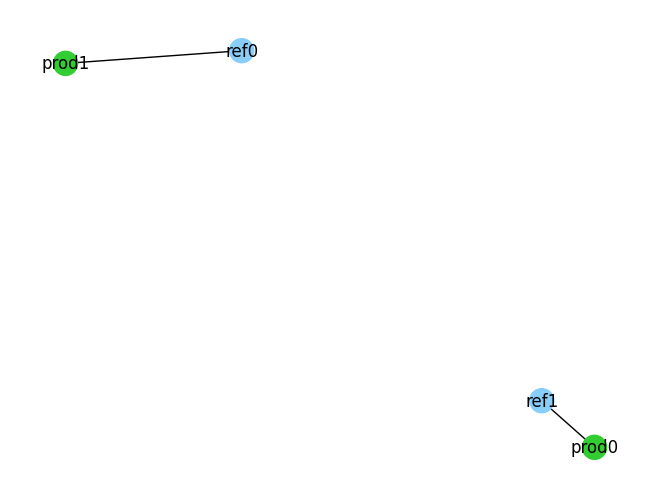

(id: 1) SURVIVED as (id: 1) (score: 0.9774097911823287)
(id: 0) SURVIVED as (id: 0) (score: 0.9821688546006833)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 134 ----> Apply macroclustering <!>



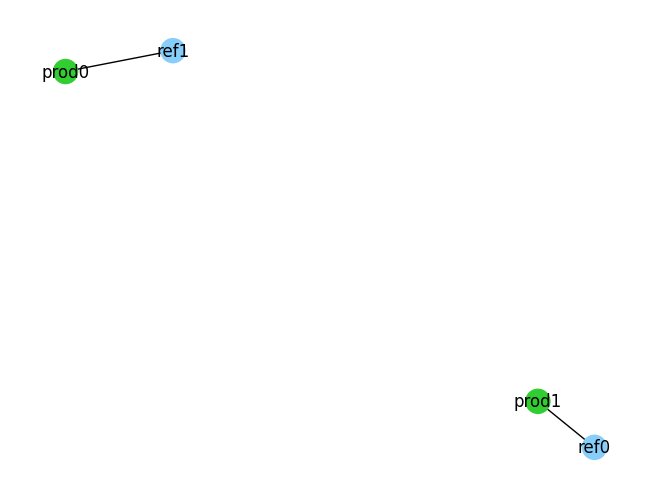

(id: 1) SURVIVED as (id: 1) (score: 0.8387303590674621)
(id: 0) SURVIVED as (id: 0) (score: 0.8721169423864652)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 213 ----> Apply macroclustering <!>



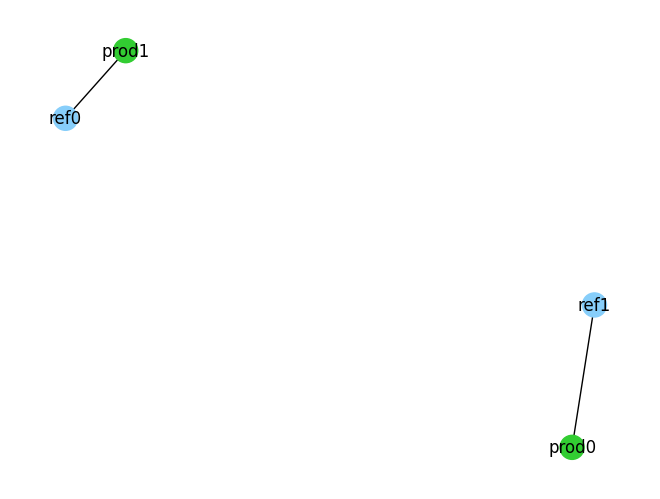

(id: 1) SURVIVED as (id: 1) (score: 0.9238338361620705)
(id: 0) SURVIVED as (id: 0) (score: 0.9544597517390779)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 433 ----> Apply macroclustering <!>



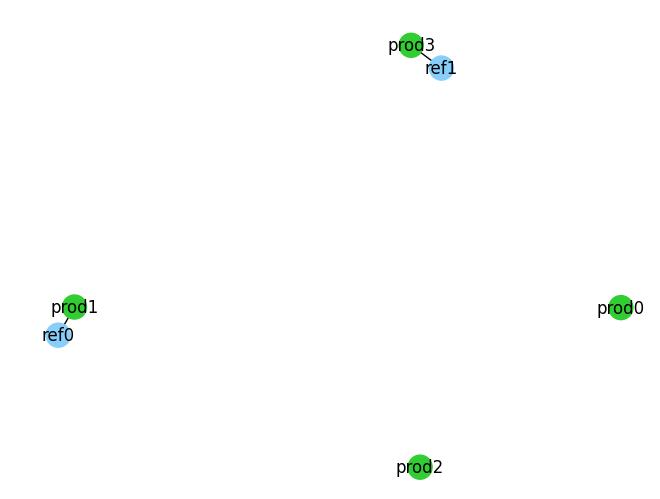

(!) (id: 2) APPEARED --- (score: 0.5077787251246906)
(id: 0) SURVIVED as (id: 0) (score: 0.857337427995899)
(!) (id: 3) APPEARED --- (score: 0.5790101493344473)
(id: 1) SURVIVED as (id: 1) (score: 0.7138546324353846)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 652 ----> Apply macroclustering <!>



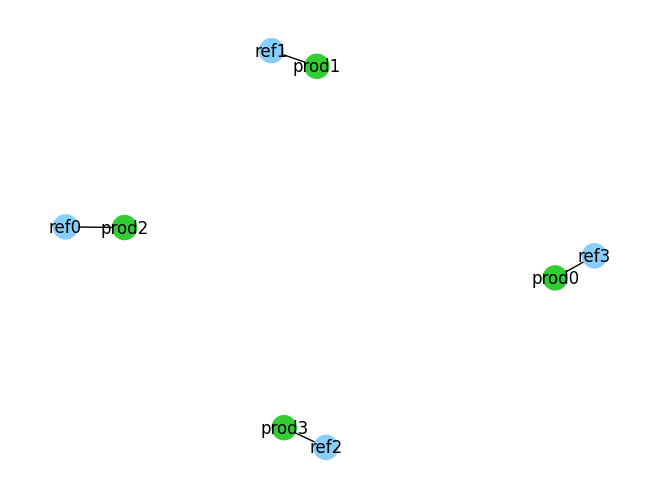

(id: 3) SURVIVED as (id: 3) (score: 0.9083703762348051)
(id: 1) SURVIVED as (id: 1) (score: 0.9865602850523271)
(id: 0) SURVIVED as (id: 0) (score: 0.963766724667293)
(id: 2) SURVIVED as (id: 2) (score: 0.8688002630712195)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

Batch Finished ----> Apply macroclustering



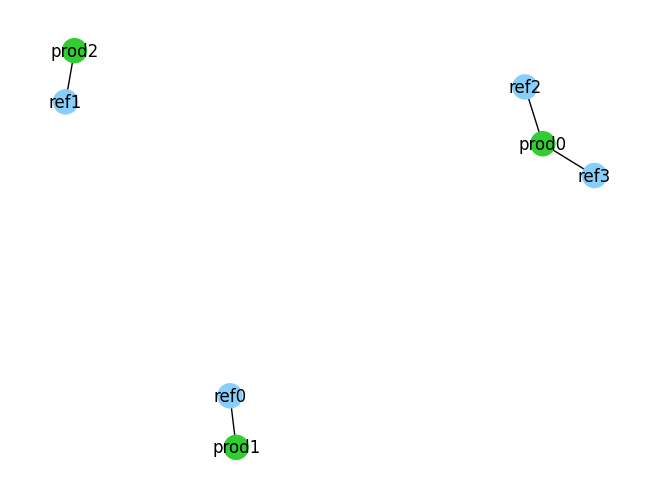

(!) [2, 3] are MERGED in (id: 4) (overlapping scores: [np.float64(0.6567313528371486), np.float64(0.6493921773957105)])
(id: 0) SURVIVED as (id: 0) (score: 0.949424830878261)
(id: 1) SURVIVED as (id: 1) (score: 0.9827895646216689)

Final macroclusters:
(id: 0)
(id: 1)
(id: 4)

-----------------------------------------------------------------------------------



In [8]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(print_graph=True, macroclustering_at_end=True)

Creating the directory...
Drawing ...


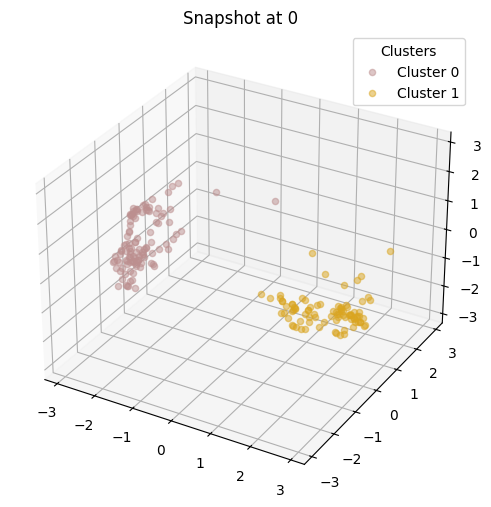

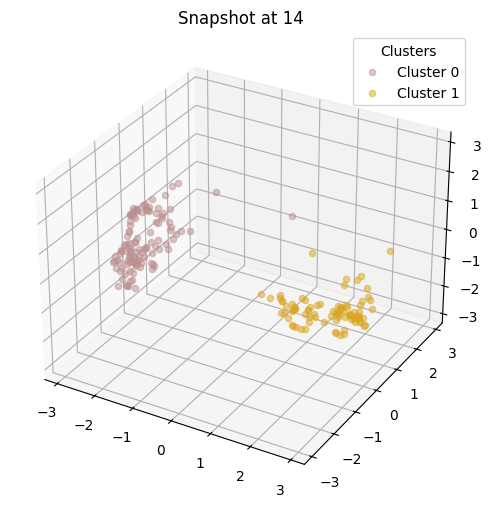

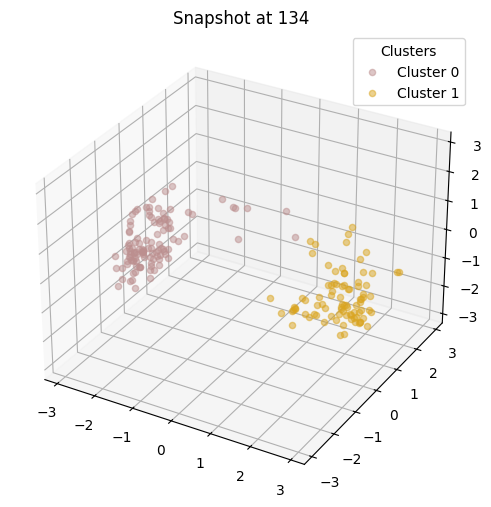

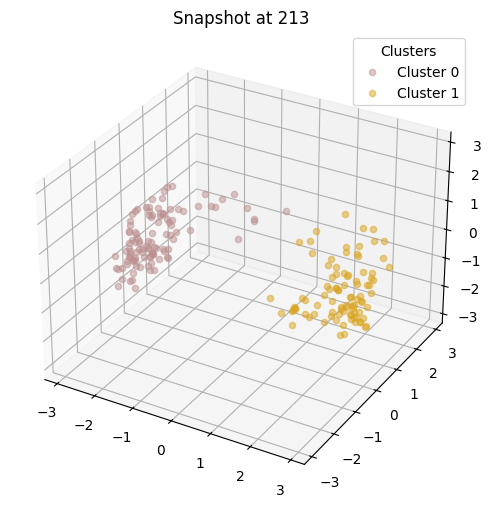

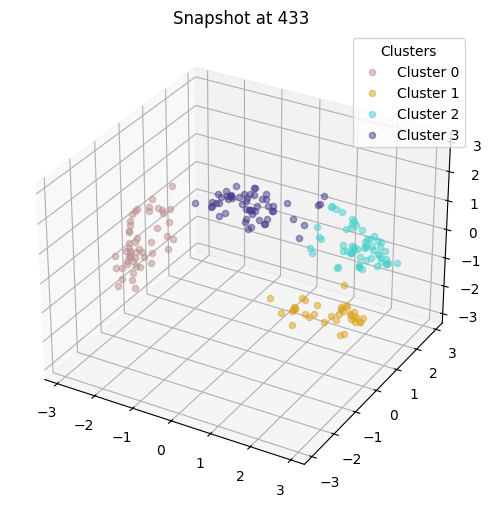

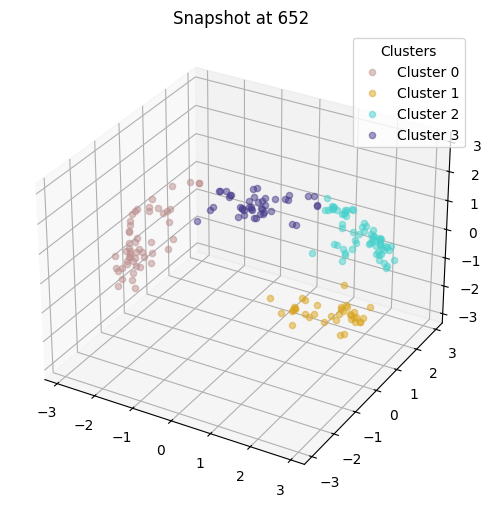

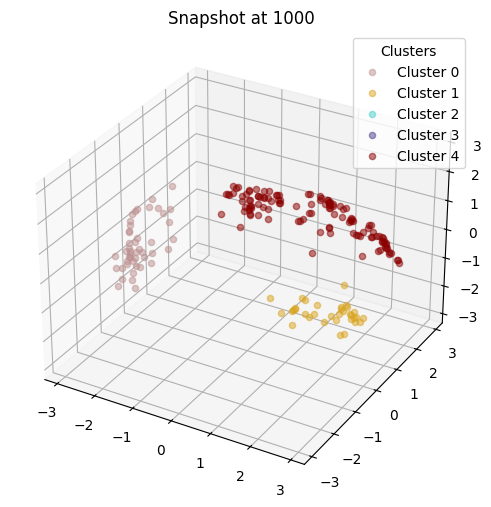

Directory './plots/61687' and its contents removed successfully.


In [9]:
clustream.visualization(dimensions=3, show_image=True, save_gif=True, clean=True)